In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.resolve()

mkpath("downloads")
mkpath("out")

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Manifest.toml`


"out"

+ https://github.com/JuliaAcademy/DataScience/blob/master/12.%20Visualization.ipynb

In [2]:
using Plots
using StatsPlots # this package provides stats specific plotting functions
gr()
using Statistics
using StatsBase
using MLBase

In [3]:
using XLSX
using DataFrames
using ColorSchemes

In [4]:
#ENV["GKS_ENCODING"] = "utf-8"
stateabbreviations = Dict("Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CT",
    "Delaware" => "DE",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KS",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH",
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC",
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PA",
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT",
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY", 
    "District of Columbia"=>"DC");

In [5]:
file = download("https://github.com/JuliaAcademy/DataScience/blob/master/data/zillow_data_download_april2020.xlsx?raw=true",
    "downloads/zillow_data_download_april2020.xlsx")
D = DataFrame(XLSX.readtable("downloads/zillow_data_download_april2020.xlsx", "Sales_median_price_city")...);
dropmissing!(D)
states = D[:,:StateName];

In [6]:
#useremo dati su regioni deli stati: ny, calif e florida
#creiamo un df per ogni stato
NYids = findall(states.=="New York")
NYframe = dropmissing(D[NYids,:])
CAids = findall(states.=="California")
CAframe = dropmissing(D[CAids,:])
FLids = findall(states.=="Florida")
FLframe = dropmissing(D[FLids,:])

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06
,Any,Any,Any,Any,Any,Any,Any,Any
1,13121,Orlando,Florida,21,222100,213700,201400,194400
2,12700,Miami,Florida,39,298900,297600,279400,261100
3,41176,Tampa,Florida,53,179400,164800,163500,163000
4,19533,Naples,Florida,71,294600,287400,283800,290900
5,47945,Tallahassee,Florida,73,183600,178900,172100,167200
6,26922,Saint Petersburg,Florida,89,156200,154900,148800,139200
7,53856,Pensacola,Florida,90,125300,124600,122900,121100
8,20362,Sarasota,Florida,100,233400,223400,218100,217000
9,53673,Ocala,Florida,118,138800,136000,132500,132200


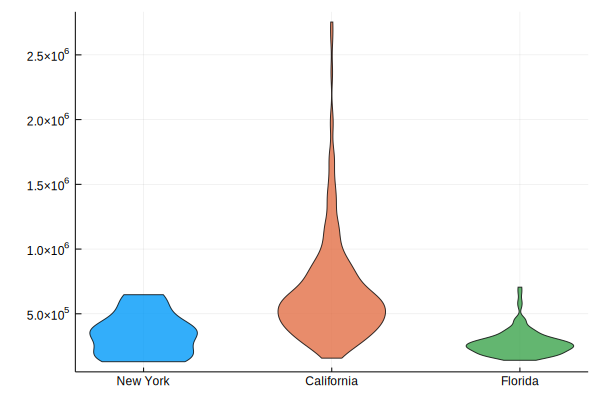

In [7]:
#violin plot
# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]

violin(["New York"], ny,legend=false,alpha=0.8)
violin!(["California"], ca,alpha=0.8)
violin!(["Florida"],fl,alpha=0.8)

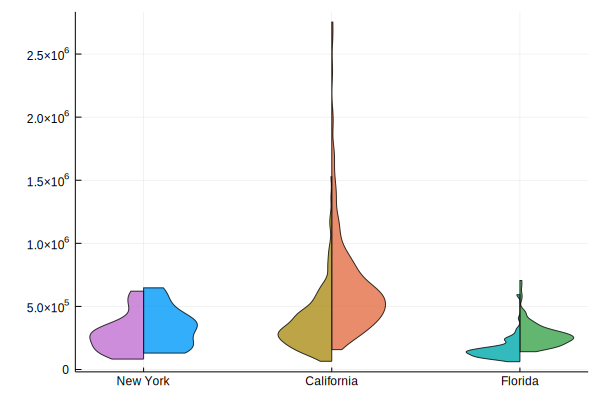

In [8]:
# plot simmetrici -> stiam sprecando spaz -> dividiamo i violini con dati di 10 anni prima
# 2020 data
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin(["New York"], ny,legend=false,alpha=0.8,side=:right)
violin!(["California"], ca,alpha=0.8,side=:right)
violin!(["Florida"],fl,alpha=0.8,side=:right)

### get the February 2010 data
ca10 = CAframe[!,Symbol("2010-02")]
ny10 = NYframe[!,Symbol("2010-02")]
fl10 = FLframe[!,Symbol("2010-02")]

violin!(["New York"], ny10,legend=false,alpha=0.8,side=:left)
violin!(["California"], ca10,alpha=0.8,side=:left)
violin!(["Florida"],fl10,alpha=0.8,side=:left)

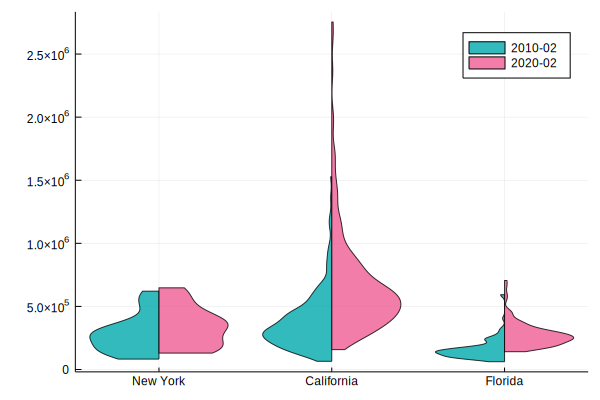

In [9]:
# plot bruttino -> usiamo colori per anni

# pick a year: 2019-02
ca = CAframe[!,Symbol("2010-02")]
ny = NYframe[!,Symbol("2010-02")]
fl = FLframe[!,Symbol("2010-02")]
violin(["New York"], ny,alpha=0.8,side=:left,color=6,label="2010-02")
violin!(["California"], ca,alpha=0.8,side=:left,color=6,label="")
violin!(["Florida"],fl,alpha=0.8,side=:left,color=6,label="")

# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin!(["New York"], ny,alpha=0.8,side=:right,color=7,label="2020-02")
violin!(["California"], ca,alpha=0.8,side=:right,color=7,label="")
violin!(["Florida"],fl,alpha=0.8,side=:right,color=7,label="")

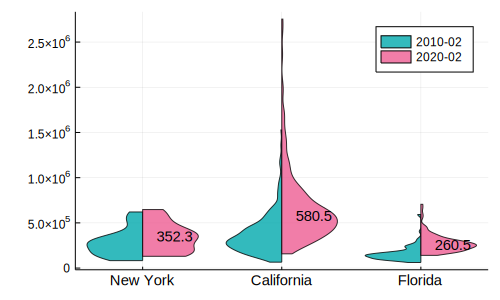

In [10]:
# aggiungiamo annotazioni delle mediane
# pick a year: 2019-02
ca = CAframe[!,Symbol("2010-02")]
ny = NYframe[!,Symbol("2010-02")]
fl = FLframe[!,Symbol("2010-02")]
violin(["New York"], ny,alpha=0.8,side=:left,color=6,label="2010-02")
violin!(["California"], ca,alpha=0.8,side=:left,color=6,label="")
violin!(["Florida"],fl,alpha=0.8,side=:left,color=6,label="")

# pick a year: 2020-02
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
violin!(["New York"], ny,alpha=0.8,side=:right,color=7,label="2020-02")
violin!(["California"], ca,alpha=0.8,side=:right,color=7,label="")
violin!(["Florida"],fl,alpha=0.8,side=:right,color=7,label="")


m = median(ny)
ep = 0.1
annotate!([(0.5+ep,m+0.05,text(m/1000,10,:left))])#<-------------annotazione

m = median(ca)
ep = 0.1
annotate!([(1.5+ep,m+0.05,text(m/1000,10,:left))])

m = median(fl)
ep = 0.1
annotate!([(2.5+ep,m+0.05,text(m/1000,10,:left))])

plot!(xtickfont=font(10),size=(500,300))

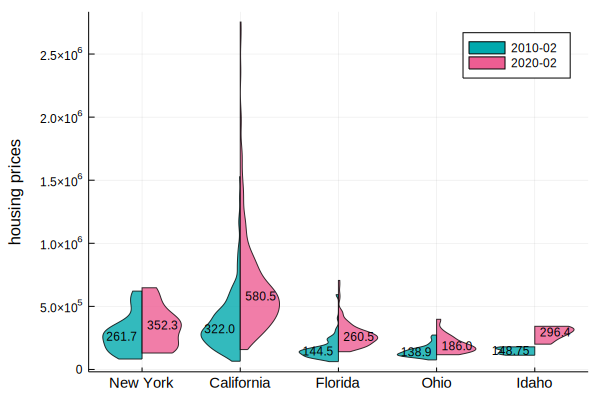

In [11]:
#mettiam tutto assieme

ep = 0.05 # will later be used in padding for annotations

# set up the plot
plot(xtickfont=font(10))

states_of_interest = ["New York", "California", "Florida", "Ohio","Idaho"]
years_of_interst = [Symbol("2010-02"),Symbol("2020-02")]

# year 1
xstart = 0.5
yi = years_of_interst[1]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart-ep,m+0.05,text(m/1000,8,:right))])
    xstart += 1
    violin!([si], curprices,alpha=0.8,side=:left,color=6,label="")
end
plot!(Shape([],[]),color=6,label=yi)

# year 2
xstart = 0.5
yi = years_of_interst[2]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart+ep,m+0.05,text(m/1000,8,:left))])
    xstart += 1
    violin!([si], curprices,alpha=0.8,side=:right,color=7,label="")
end
plot!(Shape([],[]),color=7,label=yi)
ylabel!("housing prices")

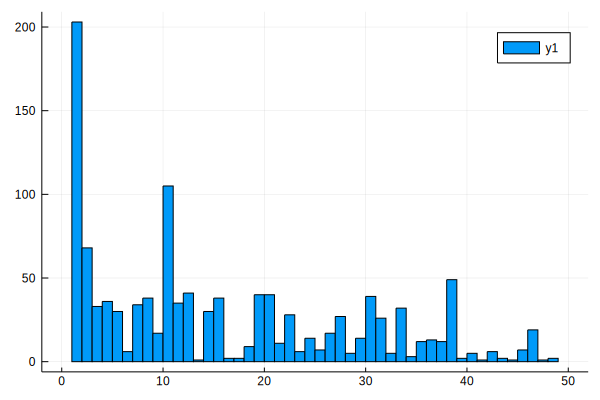

In [12]:
## plot a barre, istogrammi, insets
# usiamo plot barre per vedere quali stati han più regioni
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
histogram(stateids,nbins=length(mapstates))

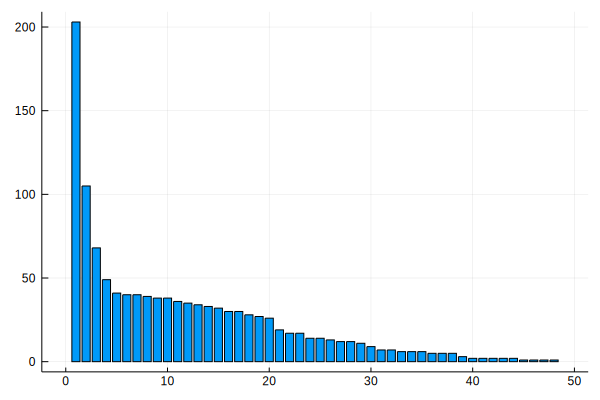

In [13]:
# barre non ordinate -> confusionali da leggere -> oordiniamole
h = fit(Histogram, stateids,nbins=length(mapstates))
sortedids = sortperm(h.weights,rev=true)
bar(h.weights[sortedids],legend=false)

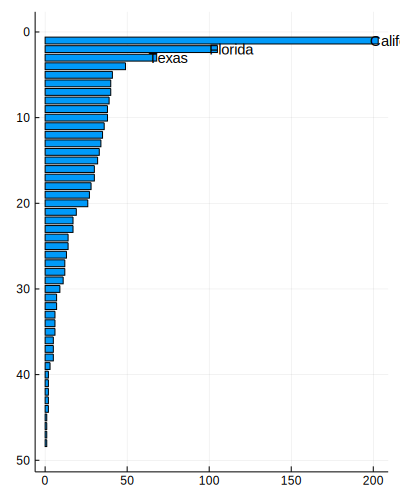

In [14]:
# orientiamo orizzontalmente le barre e aggiungiamo annotazioni degli stati con più regioni
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,size=(400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:3
    annotate!([(h.weights[sortedids][i]-5,i,text(stateannotations[i],10,:left))])
end
plot!()

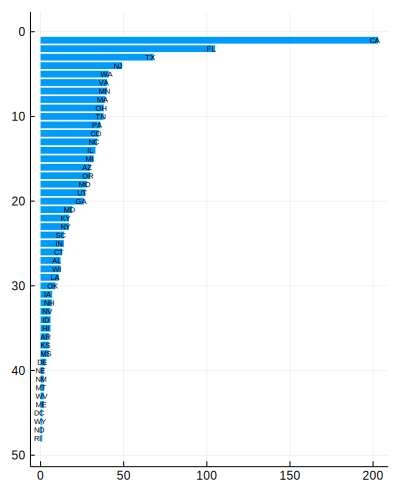

In [15]:
# ripuliamo le linee attorno alle barre e mettiamo annotazioni sigla abbreviata a ogni stato
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,size=(400,500))

stateannotations = mapstates.vs[sortedids]
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],5,:left))])
end
plot!()

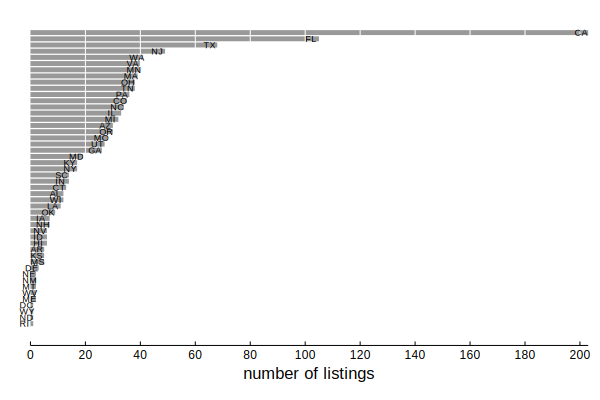

In [16]:
# stiamo usando un solo colore quindi è meglio usarne uno neutro (grigio) inoltre per la comprensione
# veloce di informaziono quantitative sui dati dividiamo le barre in unità di 20
bar(h.weights[sortedids],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
stateannotations = mapstates.vs[sortedids]
for i = 20:20:200
    plot!([i,i],[50,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)),xticks = 0:20:200)
xlabel!("number of listings")

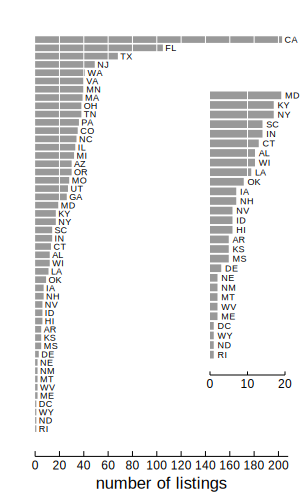

In [17]:
# infine rimpiccioleremo dimensioni eccessive e metteremo 
# un inset per far vedere  meglio la coda del grafico dove ci son valori difficili da vedere
bar(h.weights[sortedids],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,color=:gray,alpha=0.8,size=(300,500))
stateannotations = mapstates.vs[sortedids]
ht = length(h.weights)
for i = 20:20:200
    plot!([i,i],[ht,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]+2,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)+5),xticks = 0:20:200)
xlabel!("number of listings")

f = Plots.plot!(inset = bbox(0.7,0.15,0.25,0.6,:top,:left))
bar!(f[2],h.weights[sortedids][21:end],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
for i = 21:length(stateannotations)
    annotate!(f[2],[(h.weights[sortedids][i]+1,i-20,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(f[2],[10,10],[20,0],color=:white,xticks=0:10:20,yaxis=false,grid=false,xlim=(0,20))
plot!()

In [18]:
#le etichette son lunghe e verrebbero tagliate
function pad_empty_plot(p)
    ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
    newplot = plot(p,ep,layout=@layout([a{0.99h};b{0.001h}]))
    return newplot
end

pad_empty_plot (generic function with 1 method)

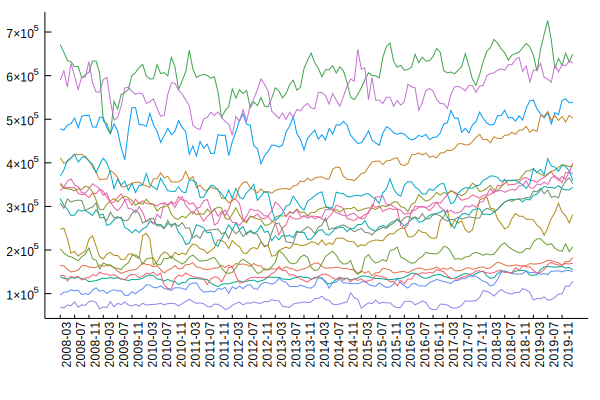

In [19]:
## plot con error bars
M = Matrix(NYframe[:,5:end])
xtickslabels = string.(names(NYframe[!,5:end]));


# vediamo i cambiamenti di prezzo di ogni regione nel tempo
plot()
for i = 1:size(M,1)
    plot!(M[i,:],legend=false)
end
plot!()
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8),grid=false)
pad_empty_plot(p)


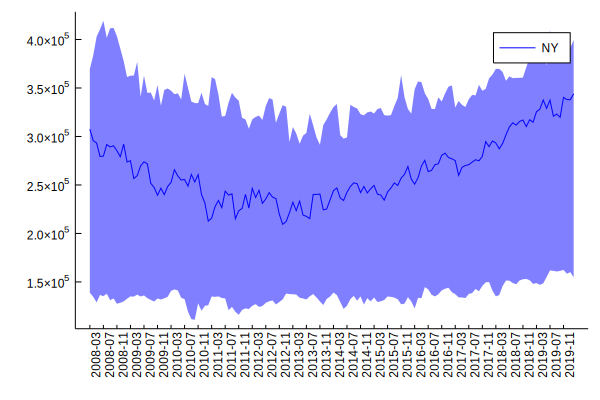

In [22]:
# cerchiamo adesso di vedere l andamento dei prezzi di ny
#calcoliamo mediane, perecentili lvl 20 e 80 e plottiamo
function find_percentile(M, pct)#fun per trovare percentili
    r = zeros(size(M,2))
    for i = 1:size(M,2)
        v = M[:,i]
        len = length(v)
        ind = floor(Int64,pct*len)
        newarr = sort(v);
        r[i] = newarr[ind];
    end
    return r
end

md = find_percentile(M,0.5)#mediana è percentile 50%
mx = find_percentile(M,0.8)
mn = find_percentile(M,0.2)
plot(md,ribbon =(md.-mn,mx.-md),color = :blue,label="NY",grid=false)
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
pad_empty_plot(p)

In [23]:
# mettiam tutto in una funzione
function plot_individual_state!(plotid,statevalue,colorid)
    curids = findall(states.==statevalue)
    curFrame = D[curids,:]
    M = Matrix(curFrame[:,5:end])
    md = find_percentile(M,0.5)
    mx = find_percentile(M,0.8)
    mn = find_percentile(M,0.2)
    plot!(plotid,md,ribbon =(md.-mn,mx.-md),color = colorid,label=stateabbreviations[statevalue],grid=false)
    plot!(plotid,xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
end

plot_individual_state! (generic function with 1 method)

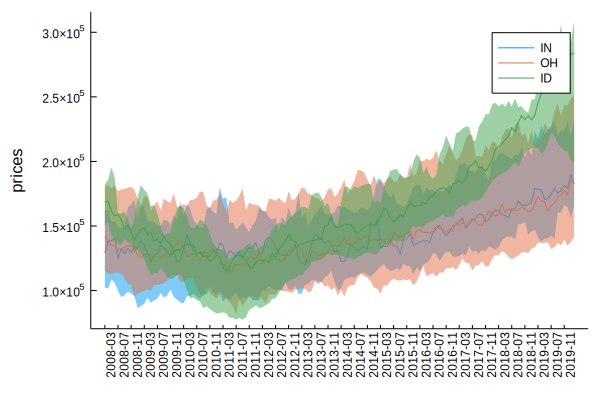

In [24]:
plotid = plot()#plot vuoto
plot_individual_state!(plotid,"Indiana",1)
plot_individual_state!(plotid,"Ohio",2)
plot_individual_state!(plotid,"Idaho",3)
# plot_individual_state!(plotid,"California",4)
ylabel!("prices")
pad_empty_plot(plotid)

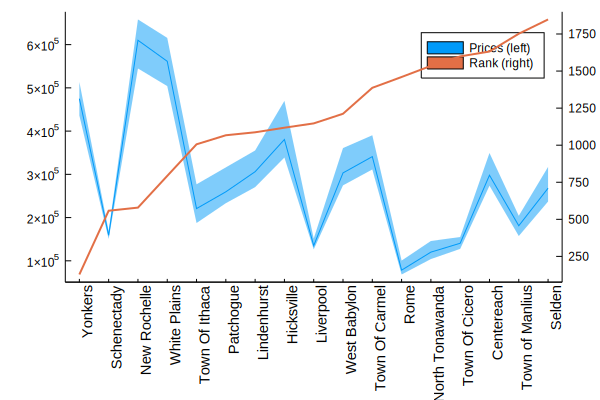

In [37]:
# plot con assi doppi
vector1 = rand(10)
vector2 = rand(10)*100
plot(vector1,label = "b",size=(300,200))
plot!(twinx(), vector2,color=2,axis=false)
xtickslabels = NYframe[!,:RegionName]
sz = NYframe[!,:SizeRank]
pc = NYframe[!,end]
M = Matrix(NYframe[:,5:end])
M = copy(M')
md = find_percentile(M,0.9)

md = find_percentile(M,0.5)
mx = find_percentile(M,0.9)
mn = find_percentile(M,0.1)
vector1 = sz

plot()
plot!(md,ribbon =(md.-mn,mx.-md),color = 1,grid=false,label="")

plot!(xticks = (1:length(xtickslabels),xtickslabels),xrotation=90,xtickfont=font(10))
plot!(twinx(), vector1,color=2,label="",ylabel="rank",grid=false,xticks=[],linewidth=2)
plot!(Shape([],[]),color=1,label="Prices (left)")
p = plot!(Shape([],[]),color=2,label="Rank (right)")

ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
plot(p,ep,layout=@layout([a{0.85h};b{0.001h}]))

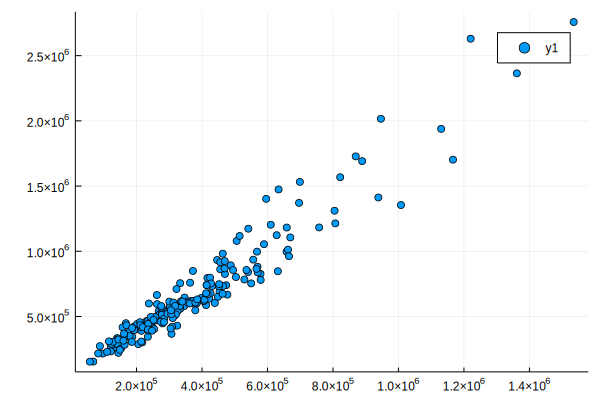

In [38]:
# plot a >2d in 2d

#plot 2d normale
CA202002 = CAframe[!,Symbol("2020-02")]
CA201002 = CAframe[!,Symbol("2010-02")]
scatter(CA201002,CA202002)


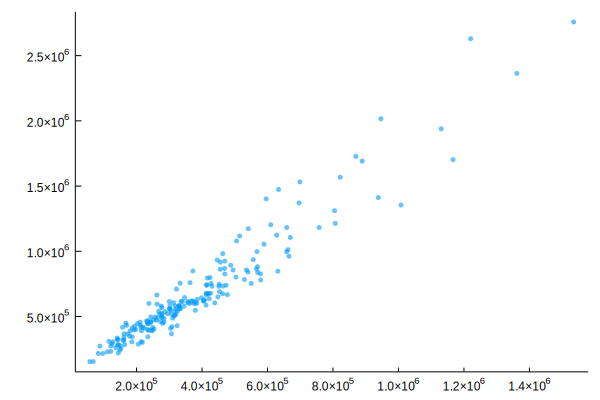

In [39]:
#esprimiamo dimensione rango con colore

CA202002 = CAframe[!,Symbol("2020-02")]
CA201002 = CAframe[!,Symbol("2010-02")]
CAranks = CAframe[!,:SizeRank]
scatter(CA201002,CA202002,legend=false,markerstrokewidth=0,markersize=3,alpha=0.6,grid=false)

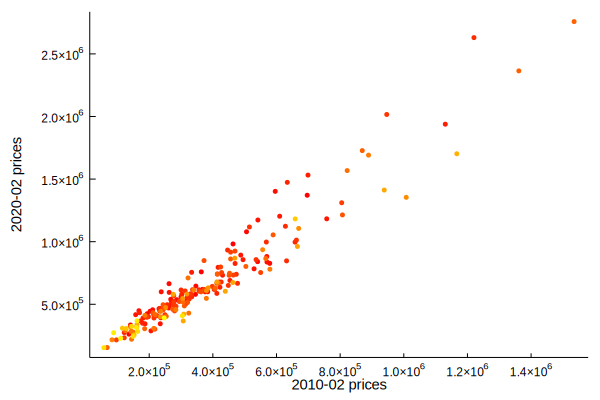

In [44]:
# normalize the ranks to be between 0 and 1
continuousranks = CAranks./maximum(CAranks)

# create a placeholder vector that will store the color of each value
colorsvec = Vector{RGB{Float64}}(undef,length(continuousranks))

# and finally map the colors according to ColorSchemes.autumn1, there are many other schemes you can choose from
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousranks[i]),1:length(colorsvec))

continuousdates = CAranks./maximum(CAranks)
colorsvec = Vector{RGB{Float64}}(undef,length(continuousdates))
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousdates[i]),1:length(colorsvec))
scatter(CA201002,CA202002,color=colorsvec,
    legend=false,markerstrokewidth=0,markersize=3,grid=false)
xlabel!("2010-02 prices",xguidefontsize=10)
ylabel!("2020-02 prices",yguidefontsize=10)
p1 = plot!()

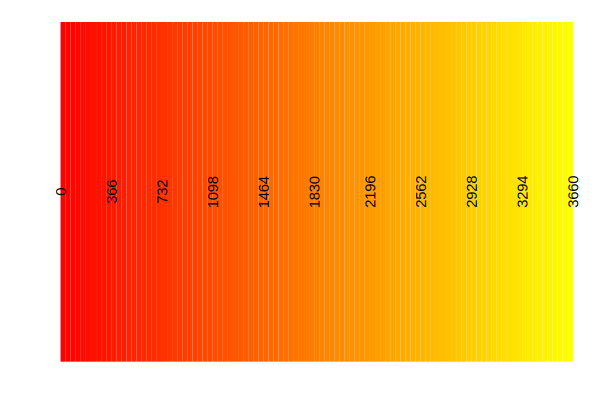

In [45]:
#possiamo fare heatmap per vedere che colorature corrispondono a ranghi alti/bassi
#set up the plot canvas
xvals = 0:100
s = Shape([0,1,1,0],[0,0,1,1])
plot(s,color=ColorSchemes.autumn1[1],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)

for i = 2:101
    s = Shape([xvals[i],xvals[i]+1,xvals[i]+1,xvals[i]],[0,0,1,1])
    plot!(s,color=ColorSchemes.autumn1[i],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)
end

mynormalizer = maximum(CAranks)
xtickslabels = 0:div(mynormalizer,10):mynormalizer
continuousdates = xtickslabels./mynormalizer
xticksloc = round.(Int,continuousdates.*101)

# annotate using the ranks
rotatedfont = font(10, "Helvetica",rotation=90)
for i = 1:length(xtickslabels)
    annotate!(xticksloc[i],0.5,text(xtickslabels[i], rotatedfont))
end
p2 = plot!()

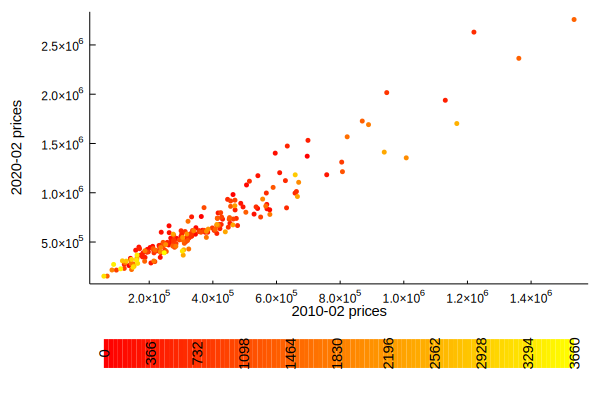

In [47]:
#aggiungiamo heatmap in basso al plot per comdoità
mylayout = @layout([a{0.89h};b{0.1h}])
plot(p1,p2,layout=mylayout)